In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude


In [3]:
pip install citipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675966 sha256=05f02d41a079d2d369593e8606de663f7fbf293159884cf700bb0d567076c45e
  Stored in directory: /root/.cache/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


ERROR: Could not find a version that satisfies the requirement api_keys (from versions: none)
ERROR: No matching distribution found for api_keys


In [5]:
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | ebaye
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | constantia
Processing Record 8 of Set 1 | yuzhno-kurilsk
Processing Record 9 of Set 1 | douglas
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | jalai nur
Processing Record 14 of Set 1 | fauske
Processing Record 15 of Set 1 | puerto gaitan
Processing Record 16 of Set 1 | alotau
City not found. Skipping...
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | port douglas
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of 

In [7]:
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [8]:
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,25.24,87,20,2.57,US,1715413994
1,ebaye,8.7748,167.7392,27.01,83,75,2.06,MH,1715413994
2,ushuaia,-54.8000,-68.3000,1.81,75,40,4.12,AR,1715413982
3,georgetown,5.4112,100.3354,31.96,74,20,4.12,MY,1715413995
4,stanley,54.8680,-1.6985,16.51,81,0,0.51,GB,1715413995


In [9]:
city_data_df.to_csv("cities.csv", index_label="City_ID")


In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,25.24,87,20,2.57,US,1715413994
1,ebaye,8.7748,167.7392,27.01,83,75,2.06,MH,1715413994
2,ushuaia,-54.8000,-68.3000,1.81,75,40,4.12,AR,1715413982
3,georgetown,5.4112,100.3354,31.96,74,20,4.12,MY,1715413995
4,stanley,54.8680,-1.6985,16.51,81,0,0.51,GB,1715413995


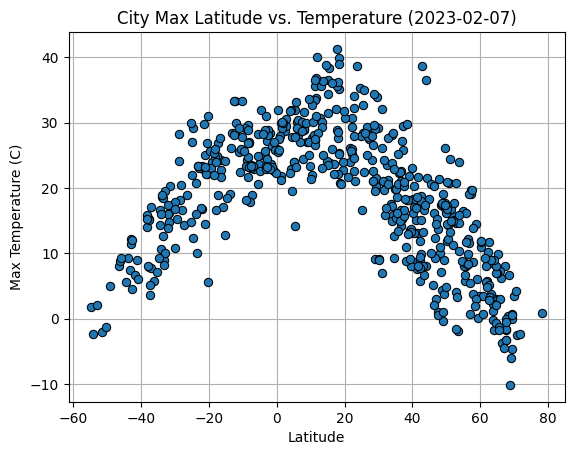

In [11]:
plt.plot(city_data_df["Lat"],
         city_data_df["Max Temp"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

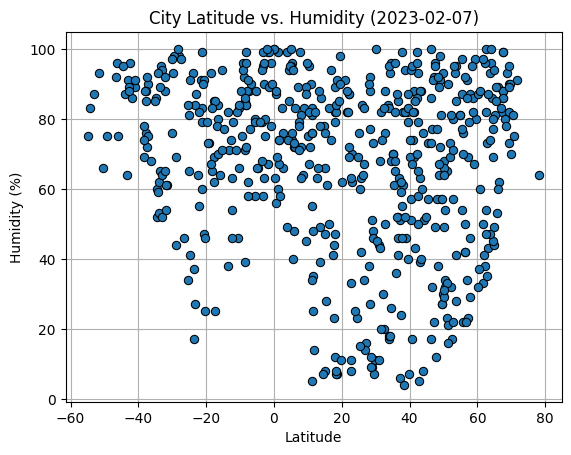

In [12]:
plt.plot(city_data_df["Lat"],
         city_data_df["Humidity"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

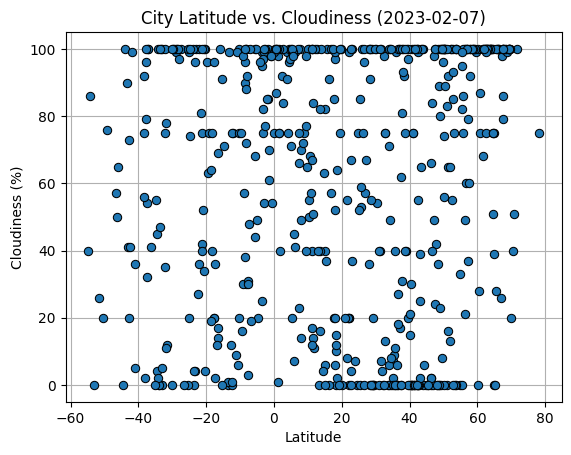

In [14]:
plt.plot(city_data_df["Lat"],
         city_data_df["Cloudiness"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()


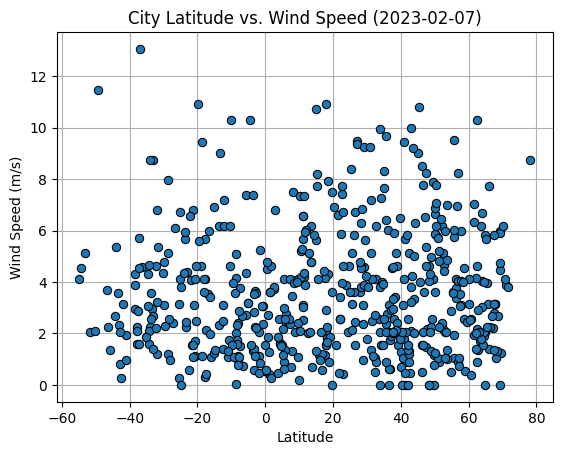

In [16]:
plt.plot(city_data_df["Lat"],
         city_data_df["Wind Speed"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [17]:
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [18]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,25.24,87,20,2.57,US,1715413994
1,ebaye,8.7748,167.7392,27.01,83,75,2.06,MH,1715413994
3,georgetown,5.4112,100.3354,31.96,74,20,4.12,MY,1715413995
4,stanley,54.8680,-1.6985,16.51,81,0,0.51,GB,1715413995
6,constantia,44.1833,28.6500,21.50,51,6,6.31,RO,1715413772


In [19]:
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,1.81,75,40,4.12,AR,1715413982
5,mount gambier,-37.8333,140.7667,15.32,76,96,1.59,AU,1715413995
10,sao joao da barra,-21.6403,-41.0511,22.85,91,81,1.54,BR,1715413997
14,bredasdorp,-34.5322,20.0403,16.61,52,4,4.32,ZA,1715413997
15,port douglas,-16.4833,145.4667,24.34,80,14,5.98,AU,1715413998


The r-value is: 0.6720786303339886


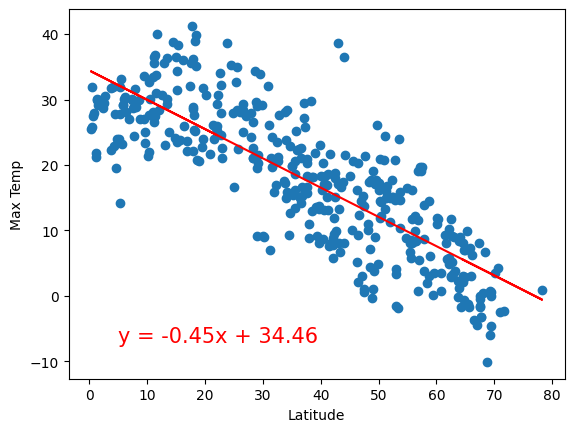

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.6471364768218876


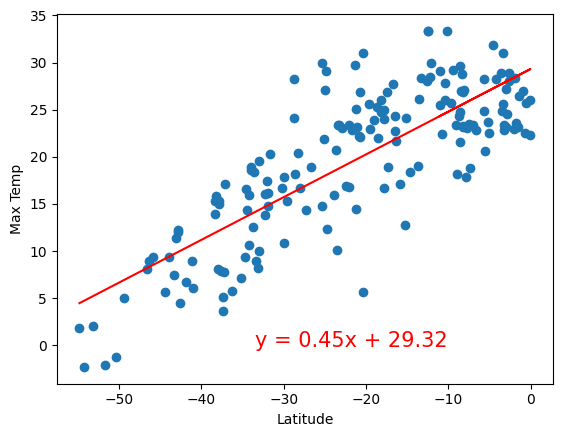

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

The r-value is: 0.002250507440990933


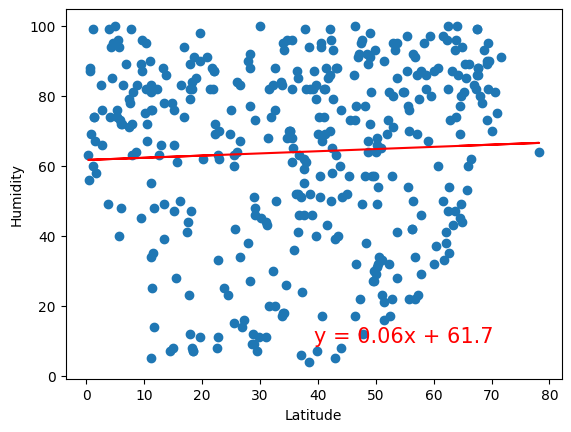

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.02410017829989251


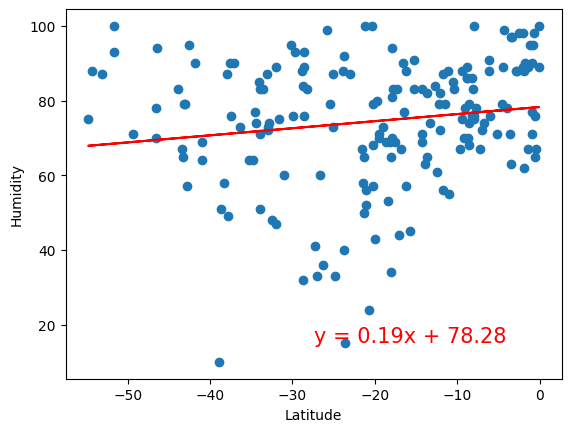

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.012224902770429242


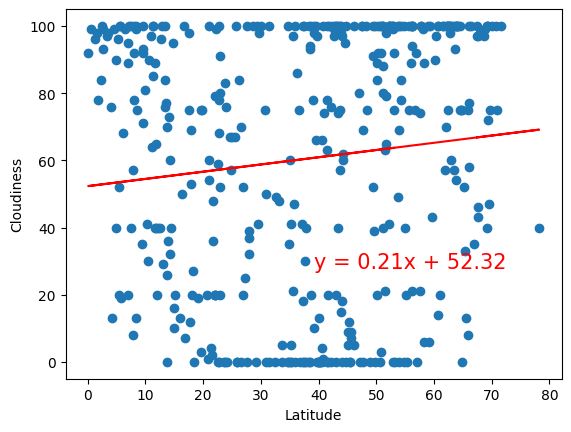

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.0022674445248933297


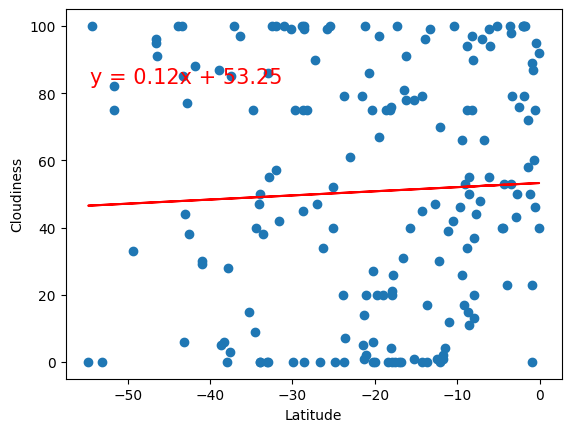

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

The r-value is: 0.01743755287126325


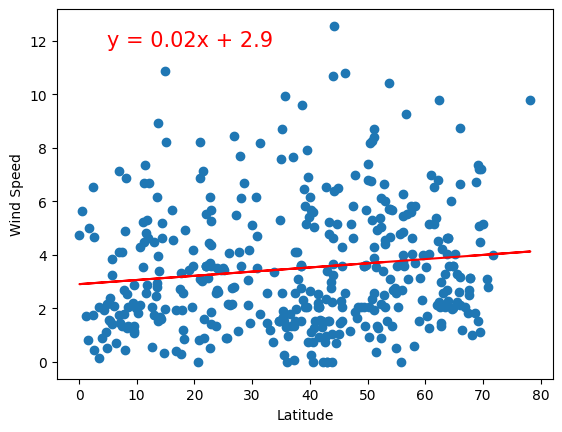

In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.02733450071482349


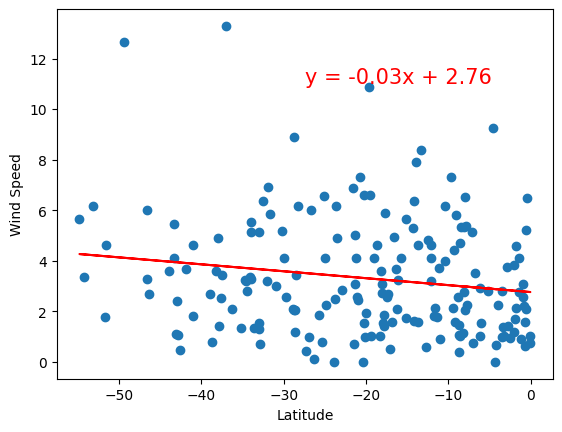

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)